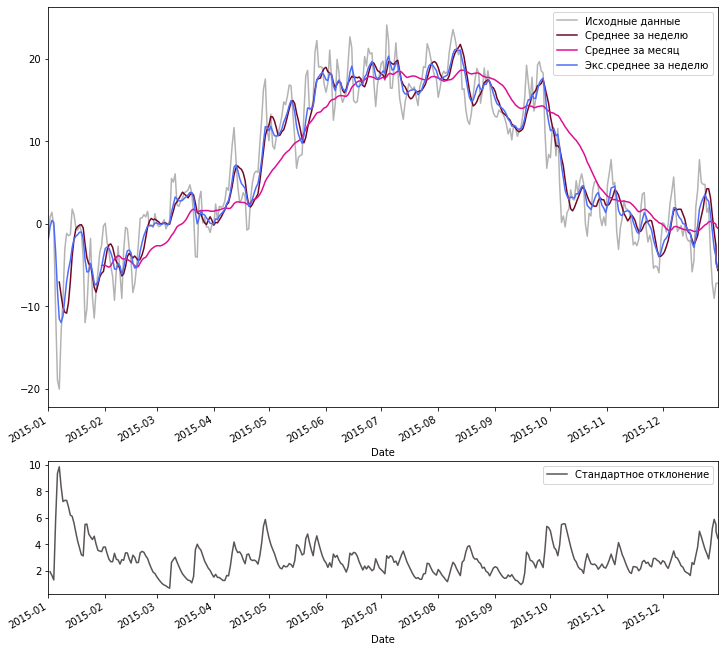

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
(area1, area2) = fig.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
data = pd.read_csv("https://video.ittensive.com/python-advanced/weather-moscow.txt", delimiter="\t", names=["Month", "Day", "Year", "F"])
data["Date"] = pd.to_datetime(data.astype(str).Year + "-" +
                data.astype(str).Month + "-" +
                data.astype(str).Day)
data["C"] = (data["F"] - 32)/1.8
data = data.set_index("Date")
data["C"]["2015"].plot(ax=area1, color=".7", label="Исходные данные")
data["C"]["2015"].rolling(window=7).mean().plot(ax=area1, color="#710627", label="Среднее за неделю")
data["C"]["2015"].rolling(window=30).mean().plot(ax=area1, color="#DE0D92", label="Среднее за месяц")
data["C"]["2015"].ewm(span=7).mean().plot(ax=area1, color="#4D6CFA", label="Экс.среднее за неделю")
area1.legend()
data["C"]["2015"].ewm(span=7).std().plot(ax=area2, color="#595457", label="Стандартное отклонение")
area2.legend()
plt.show()